In [1]:
#Dependencies for data handling 
import pandas as pd
import numpy as np

#Dependencies for visualizations
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

#Dependencies for statisical evaluation and datetime 
import scipy.stats as st 
from datetime import date, timedelta

In [2]:
#Study FBI NICs Files  
#https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view
#Converted from pdf to CSV
fbi_nics_path = "Data/nics_checks.csv"

In [3]:
#Reading in the CSV and storing into DataFrame
NICS = pd.read_csv(fbi_nics_path)

In [4]:
NICS.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-05,Alabama,17637.0,337.0,18288.0,10569.0,1085.0,922,1.0,11.0,...,0.0,0.0,0.0,33.0,15.0,5.0,0.0,0.0,0.0,51735
1,2022-05,Alaska,207.0,10.0,3193.0,2463.0,303.0,180,0.0,2.0,...,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,6661
2,2022-05,Arizona,9868.0,1574.0,18297.0,8087.0,1511.0,1226,0.0,9.0,...,1.0,0.0,0.0,7.0,7.0,1.0,0.0,0.0,0.0,42163
3,2022-05,Arkansas,2496.0,289.0,6381.0,4276.0,327.0,376,2.0,5.0,...,0.0,0.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0,15854
4,2022-05,California,18159.0,11740.0,37659.0,23729.0,5143.0,0,0.0,2.0,...,214.0,0.0,0.0,7362.0,3033.0,607.0,20.0,4.0,0.0,111612


In [5]:
#Creating new dataframe selecting relevant columns we're interested in to join on with mass_shootings,accidental_deaths, etc...
#I would recommend renaming "Incident Date" to Date in those csvs and joining on Date and State. 
NICS_df = NICS[['month', 'state', 'handgun', 'long_gun','multiple', 'totals' ]].copy()
NICS_df.head()

,month,state,handgun,long_gun,multiple,totals
0,2022-05,Alabama,18288.0,10569.0,922,51735
1,2022-05,Alaska,3193.0,2463.0,180,6661
2,2022-05,Arizona,18297.0,8087.0,1226,42163
3,2022-05,Arkansas,6381.0,4276.0,376,15854
4,2022-05,California,37659.0,23729.0,0,111612


In [6]:
#Renaming columns to a more cleaner and more accuarate description to fit the tables in the dataframe
NICS_df.rename({'month':'Date', 'state':'State','handgun':'Handgun','long_gun':'Longgun','multiple':'Multiples', 'totals':'Totals'}, axis=1, inplace=True)
NICS_df.head(20)

,Date,State,Handgun,Longgun,Multiples,Totals
0,2022-05,Alabama,18288.0,10569.0,922,51735
1,2022-05,Alaska,3193.0,2463.0,180,6661
2,2022-05,Arizona,18297.0,8087.0,1226,42163
3,2022-05,Arkansas,6381.0,4276.0,376,15854
4,2022-05,California,37659.0,23729.0,0,111612
5,2022-05,Colorado,19421.0,11234.0,1590,40505
6,2022-05,Connecticut,5463.0,1585.0,0,18914
7,2022-05,Delaware,2071.0,1209.0,109,4322
8,2022-05,District of Columbia,369.0,11.0,4,878
9,2022-05,Florida,59519.0,20002.0,2853,111723


In [7]:
#Datetime
NICS_df['Date'] = pd.to_datetime(NICS_df['Date'])
NICS_df

,Date,State,Handgun,Longgun,Multiples,Totals
0,2022-05-01,Alabama,18288.0,10569.0,922,51735
1,2022-05-01,Alaska,3193.0,2463.0,180,6661
2,2022-05-01,Arizona,18297.0,8087.0,1226,42163
3,2022-05-01,Arkansas,6381.0,4276.0,376,15854
4,2022-05-01,California,37659.0,23729.0,0,111612
...,...,...,...,...,...,...
15560,1998-11-01,Virginia,14.0,2.0,8,24
15561,1998-11-01,Washington,65.0,286.0,8,361
15562,1998-11-01,West Virginia,149.0,251.0,5,408
15563,1998-11-01,Wisconsin,25.0,214.0,2,241


In [8]:
#Describe new DF
NICS_df.describe()

,Handgun,Longgun,Multiples,Totals
count,15545.000000,15546.000000,15565.000000,1.556500e+04
mean,7399.308781,8020.057828,307.273755,2.705638e+04
std,10926.859868,9181.750314,777.278350,4.993884e+04
min,0.000000,0.000000,0.000000,0.000000e+00
25%,1080.000000,2202.000000,13.000000,5.184000e+03
50%,3653.000000,5326.500000,137.000000,1.372000e+04
75%,8963.000000,10868.750000,342.000000,3.021800e+04
max,147714.000000,108058.000000,38907.000000,1.427917e+06


In [9]:
#Extracting year and month from date in pandas creating DateTime series
NICS_df['Date'] = pd.to_datetime(NICS_df['Date'],format='%Y%m%d')
NICS_df['Year'] = pd.DatetimeIndex(NICS_df['Date']).year
NICS_df['Month'] = pd.DatetimeIndex(NICS_df['Date']).month
NICS_df.head(20)

,Date,State,Handgun,Longgun,Multiples,Totals,Year,Month
0,2022-05-01,Alabama,18288.0,10569.0,922,51735,2022,5
1,2022-05-01,Alaska,3193.0,2463.0,180,6661,2022,5
2,2022-05-01,Arizona,18297.0,8087.0,1226,42163,2022,5
3,2022-05-01,Arkansas,6381.0,4276.0,376,15854,2022,5
4,2022-05-01,California,37659.0,23729.0,0,111612,2022,5
5,2022-05-01,Colorado,19421.0,11234.0,1590,40505,2022,5
6,2022-05-01,Connecticut,5463.0,1585.0,0,18914,2022,5
7,2022-05-01,Delaware,2071.0,1209.0,109,4322,2022,5
8,2022-05-01,District of Columbia,369.0,11.0,4,878,2022,5
9,2022-05-01,Florida,59519.0,20002.0,2853,111723,2022,5


# FBI NICs Statistical Summary for ALL Years

In [10]:
NICS_df.groupby('State').agg(['mean', 'median'])

Date                  Handgun  \
                                              mean     median          mean   
State                                                                         
Alabama              2010-08-01 05:51:05.724381696 2010-08-01  11480.484099   
Alaska               2010-08-01 05:51:05.724381696 2010-08-01   2151.904594   
Arizona              2010-08-01 05:51:05.724381696 2010-08-01  10050.452297   
Arkansas             2010-08-01 05:51:05.724381696 2010-08-01   4954.212014   
California           2010-08-01 05:51:05.724381696 2010-08-01  29463.077739   
Colorado             2010-08-01 05:51:05.724381696 2010-08-01  13194.049470   
Connecticut          2010-08-01 05:51:05.724381696 2010-08-01   4268.084806   
Delaware             2010-08-01 05:51:05.724381696 2010-08-01   1213.886926   
District of Columbia 2010-08-01 05:51:05.724381696 2010-08-01     61.134276   
Florida              2010-08-01 05:51:05.724381696 2010-08-01  33576.858657   
Georgia              2010-08-01 05:51:05.724381696 2010-08-01  11458.572438   
Guam                 2010-08-01 05:51:05.724381696 2010-08-01     58.024735   
Hawaii               2010-08-01 05:51:05.724381696 2010-08-01      0.010601   
Idaho                2010-08-01 05:51:05.724381696 2010-08-01   2837.932862   
Illinois             2010-08-01 05:51:05.724381696 2010-08-01  13607.833922   
Indiana              2010-08-01 05:51:05.724381696 2010-08-01  12364.222615   
Iowa                 2010-08-01 05:51:05.724381696 2010-08-01    214.201413   
Kansas               2010-08-01 05:51:05.724381696 2010-08-01   4732.572438   
Kentucky             2010-08-01 05:51:05.724381696 2010-08-01   8807.540636   
Louisiana            2010-08-01 05:51:05.724381696 2010-08-01   9086.773852   
Maine                2010-08-01 05:51:05.724381696 2010-08-01   2336.862191   
Mariana Islands      2010-08-01 05:51:05.724381696 2010-08-01      3.083942   
Maryland             2010-08-01 05:51:05.724381696 2010-08-01   3362.533569   
Massachusetts        2010-08-01 05:51:05.724381696 2010-08-01   3440.876325   
Michigan             2010-08-01 05:51:05.724381696 2010-08-01   7431.692580   
Minnesota            2010-08-01 05:51:05.724381696 2010-08-01   6408.925795   
Mississippi          2010-08-01 05:51:05.724381696 2010-08-01   6324.431095   
Missouri             2010-08-01 05:51:05.724381696 2010-08-01  13015.745583   
Montana              2010-08-01 05:51:05.724381696 2010-08-01   2430.427562   
Nebraska             2010-08-01 05:51:05.724381696 2010-08-01     76.392226   
Nevada               2010-08-01 05:51:05.724381696 2010-08-01   3964.745583   
New Hampshire        2010-08-01 05:51:05.724381696 2010-08-01   3253.445230   
New Jersey           2010-08-01 05:51:05.724381696 2010-08-01   3395.943463   
New Mexico           2010-08-01 05:51:05.724381696 2010-08-01   4239.639576   
New York             2010-08-01 05:51:05.724381696 2010-08-01   5376.268551   
North Carolina       2010-08-01 05:51:05.724381696 2010-08-01    908.943463   
North Dakota         2010-08-01 05:51:05.724381696 2010-08-01   1144.724382   
Ohio                 2010-08-01 05:51:05.724381696 2010-08-01  18966.091873   
Oklahoma             2010-08-01 05:51:05.724381696 2010-08-01   9054.809187   
Oregon               2010-08-01 05:51:05.724381696 2010-08-01   9180.865724   
Pennsylvania         2010-08-01 05:51:05.724381696 2010-08-01  18019.416961   
Puerto Rico          2010-08-01 05:51:05.724381696 2010-08-01   1137.978799   
Rhode Island         2010-08-01 05:51:05.724381696 2010-08-01    752.724382   
South Carolina       2010-08-01 05:51:05.724381696 2010-08-01   7464.356890   
South Dakota         2010-08-01 05:51:05.724381696 2010-08-01   1692.703180   
Tennessee            2010-08-01 05:51:05.724381696 2010-08-01  17035.954064   
Texas                2010-08-01 05:51:05.724381696 2010-08-01  35331.151943   
Utah                 2010-08-01 05:51:05.724381696 2010-08-01   3080.275618   
Vermont          

In [11]:
NICS_df.groupby('State').agg(['mean', 'median'])

Date                  Handgun  \
                                              mean     median          mean   
State                                                                         
Alabama              2010-08-01 05:51:05.724381696 2010-08-01  11480.484099   
Alaska               2010-08-01 05:51:05.724381696 2010-08-01   2151.904594   
Arizona              2010-08-01 05:51:05.724381696 2010-08-01  10050.452297   
Arkansas             2010-08-01 05:51:05.724381696 2010-08-01   4954.212014   
California           2010-08-01 05:51:05.724381696 2010-08-01  29463.077739   
Colorado             2010-08-01 05:51:05.724381696 2010-08-01  13194.049470   
Connecticut          2010-08-01 05:51:05.724381696 2010-08-01   4268.084806   
Delaware             2010-08-01 05:51:05.724381696 2010-08-01   1213.886926   
District of Columbia 2010-08-01 05:51:05.724381696 2010-08-01     61.134276   
Florida              2010-08-01 05:51:05.724381696 2010-08-01  33576.858657   
Georgia              2010-08-01 05:51:05.724381696 2010-08-01  11458.572438   
Guam                 2010-08-01 05:51:05.724381696 2010-08-01     58.024735   
Hawaii               2010-08-01 05:51:05.724381696 2010-08-01      0.010601   
Idaho                2010-08-01 05:51:05.724381696 2010-08-01   2837.932862   
Illinois             2010-08-01 05:51:05.724381696 2010-08-01  13607.833922   
Indiana              2010-08-01 05:51:05.724381696 2010-08-01  12364.222615   
Iowa                 2010-08-01 05:51:05.724381696 2010-08-01    214.201413   
Kansas               2010-08-01 05:51:05.724381696 2010-08-01   4732.572438   
Kentucky             2010-08-01 05:51:05.724381696 2010-08-01   8807.540636   
Louisiana            2010-08-01 05:51:05.724381696 2010-08-01   9086.773852   
Maine                2010-08-01 05:51:05.724381696 2010-08-01   2336.862191   
Mariana Islands      2010-08-01 05:51:05.724381696 2010-08-01      3.083942   
Maryland             2010-08-01 05:51:05.724381696 2010-08-01   3362.533569   
Massachusetts        2010-08-01 05:51:05.724381696 2010-08-01   3440.876325   
Michigan             2010-08-01 05:51:05.724381696 2010-08-01   7431.692580   
Minnesota            2010-08-01 05:51:05.724381696 2010-08-01   6408.925795   
Mississippi          2010-08-01 05:51:05.724381696 2010-08-01   6324.431095   
Missouri             2010-08-01 05:51:05.724381696 2010-08-01  13015.745583   
Montana              2010-08-01 05:51:05.724381696 2010-08-01   2430.427562   
Nebraska             2010-08-01 05:51:05.724381696 2010-08-01     76.392226   
Nevada               2010-08-01 05:51:05.724381696 2010-08-01   3964.745583   
New Hampshire        2010-08-01 05:51:05.724381696 2010-08-01   3253.445230   
New Jersey           2010-08-01 05:51:05.724381696 2010-08-01   3395.943463   
New Mexico           2010-08-01 05:51:05.724381696 2010-08-01   4239.639576   
New York             2010-08-01 05:51:05.724381696 2010-08-01   5376.268551   
North Carolina       2010-08-01 05:51:05.724381696 2010-08-01    908.943463   
North Dakota         2010-08-01 05:51:05.724381696 2010-08-01   1144.724382   
Ohio                 2010-08-01 05:51:05.724381696 2010-08-01  18966.091873   
Oklahoma             2010-08-01 05:51:05.724381696 2010-08-01   9054.809187   
Oregon               2010-08-01 05:51:05.724381696 2010-08-01   9180.865724   
Pennsylvania         2010-08-01 05:51:05.724381696 2010-08-01  18019.416961   
Puerto Rico          2010-08-01 05:51:05.724381696 2010-08-01   1137.978799   
Rhode Island         2010-08-01 05:51:05.724381696 2010-08-01    752.724382   
South Carolina       2010-08-01 05:51:05.724381696 2010-08-01   7464.356890   
South Dakota         2010-08-01 05:51:05.724381696 2010-08-01   1692.703180   
Tennessee            2010-08-01 05:51:05.724381696 2010-08-01  17035.954064   
Texas                2010-08-01 05:51:05.724381696 2010-08-01  35331.151943   
Utah                 2010-08-01 05:51:05.724381696 2010-08-01   3080.275618   
Vermont          

# FBI NICs Checks for the year 2016

In [12]:
#Retrieving only the 2016 DataSet
nics_2016_df = NICS_df.query('20151231 < Date < 20161231')
nics_2016_df.tail(25)

,Date,State,Handgun,Longgun,Multiples,Totals,Year,Month
4210,2016-01-01,Nevada,6064.0,2835.0,257,12291,2016,1
4211,2016-01-01,New Hampshire,7146.0,3591.0,4,16887,2016,1
4212,2016-01-01,New Jersey,4520.0,4005.0,0,8683,2016,1
4213,2016-01-01,New Mexico,5921.0,4206.0,288,12577,2016,1
4214,2016-01-01,New York,12020.0,15461.0,200,34071,2016,1
4215,2016-01-01,North Carolina,1350.0,12950.0,178,51646,2016,1
4216,2016-01-01,North Dakota,2159.0,2554.0,81,5877,2016,1
4217,2016-01-01,Ohio,38028.0,18613.0,1322,76218,2016,1
4218,2016-01-01,Oklahoma,18688.0,10863.0,889,34889,2016,1
4219,2016-01-01,Oregon,15930.0,10403.0,0,26378,2016,1


# FBI NICs Statisical Summary 

In [13]:
#FBI NICs 2016 Statistics of Checks
nics_2016_df.describe()

,Handgun,Longgun,Multiples,Totals,Year,Month
count,660.000000,660.000000,660.000000,660.000000,660.0,660.000000
mean,12250.754545,9073.501515,390.489394,41553.806061,2016.0,6.500000
std,14333.189656,9923.793158,549.652997,57826.709125,0.0,3.454671
min,0.000000,0.000000,0.000000,0.000000,2016.0,1.000000
25%,2441.750000,2971.500000,8.000000,8830.500000,2016.0,3.750000
50%,7034.500000,5931.000000,200.500000,22212.500000,2016.0,6.500000
75%,16485.750000,12759.500000,529.000000,48175.750000,2016.0,9.250000
max,72626.000000,93224.000000,3891.000000,397059.000000,2016.0,12.000000


Text(0, 0.5, 'Number of ran NICs Checks')

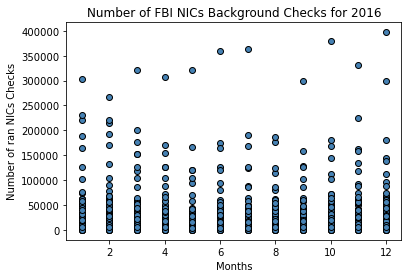

In [14]:
#Arbitrary Plot we probably dont need 
plt.scatter(nics_2016_df["Month"],nics_2016_df["Totals"],edgecolors="black",facecolors="steelblue")
plt.title("Number of FBI NICs Background Checks for 2016")
plt.xlabel("Months")
plt.ylabel("Number of ran NICs Checks")

# FBI NICs Statiscal Summary By State and Month 

In [15]:
#FBI NICs Statisical Summary for the year 2016 
nics_2016_df.groupby('State').agg(['mean', 'median'])

Date                  Handgun           \
                                    mean     median          mean   median   
State                                                                        
Alabama              2016-06-16 08:00:00 2016-06-16  12760.250000   9937.0   
Alaska               2016-06-16 08:00:00 2016-06-16   3124.250000   3011.5   
Arizona              2016-06-16 08:00:00 2016-06-16  13898.666667  13389.5   
Arkansas             2016-06-16 08:00:00 2016-06-16   6687.000000   5994.5   
California           2016-06-16 08:00:00 2016-06-16  46696.250000  44863.5   
Colorado             2016-06-16 08:00:00 2016-06-16  20208.500000  19407.0   
Connecticut          2016-06-16 08:00:00 2016-06-16  10197.916667  10640.5   
Delaware             2016-06-16 08:00:00 2016-06-16   2131.166667   1974.0   
District of Columbia 2016-06-16 08:00:00 2016-06-16     56.250000     55.5   
Florida              2016-06-16 08:00:00 2016-06-16  55192.333333  55049.0   
Georgia              2016-06-16 08:00:00 2016-06-16  16233.333333  14570.5   
Guam                 2016-06-16 08:00:00 2016-06-16    104.083333    103.0   
Hawaii               2016-06-16 08:00:00 2016-06-16      0.000000      0.0   
Idaho                2016-06-16 08:00:00 2016-06-16   3876.916667   3752.5   
Illinois             2016-06-16 08:00:00 2016-06-16  29367.583333  28757.5   
Indiana              2016-06-16 08:00:00 2016-06-16  23181.833333  20907.0   
Iowa                 2016-06-16 08:00:00 2016-06-16    232.500000    203.5   
Kansas               2016-06-16 08:00:00 2016-06-16   6759.666667   6301.0   
Kentucky             2016-06-16 08:00:00 2016-06-16  11726.750000   9884.0   
Louisiana            2016-06-16 08:00:00 2016-06-16  14299.000000  13410.0   
Maine                2016-06-16 08:00:00 2016-06-16   4070.416667   4052.5   
Mariana Islands      2016-06-16 08:00:00 2016-06-16      0.000000      0.0   
Maryland             2016-06-16 08:00:00 2016-06-16   4358.750000   4284.0   
Massachusetts        2016-06-16 08:00:00 2016-06-16   6331.416667   6255.0   
Michigan             2016-06-16 08:00:00 2016-06-16  13739.833333  13139.0   
Minnesota            2016-06-16 08:00:00 2016-06-16  11163.500000  11866.0   
Mississippi          2016-06-16 08:00:00 2016-06-16   9920.833333   9819.5   
Missouri             2016-06-16 08:00:00 2016-06-16  22896.166667  21392.5   
Montana              2016-06-16 08:00:00 2016-06-16   3128.916667   3012.0   
Nebraska             2016-06-16 08:00:00 2016-06-16    143.083333    129.0   
Nevada               2016-06-16 08:00:00 2016-06-16   5513.166667   5404.0   
New Hampshire        2016-06-16 08:00:00 2016-06-16   5710.750000   5624.5   
New Jersey           2016-06-16 08:00:00 2016-06-16   5854.083333   5624.5   
New Mexico           2016-06-16 08:00:00 2016-06-16   5786.166667   5414.5   
New York             2016-06-16 08:00:00 2016-06-16  11107.083333  11028.5   
North Carolina       2016-06-16 08:00:00 2016-06-16   1382.916667   1300.0   
North Dakota         2016-06-16 08:00:00 2016-06-16   1664.583333   1736.5   
Ohio                 2016-06-16 08:00:00 2016-06-16  32880.833333  31776.0   
Oklahoma             2016-06-16 08:00:00 2016-06-16  13848.416667  12532.5   
Oregon               2016-06-16 08:00:00 2016-06-16  14893.000000  14516.5   
Pennsylvania         2016-06-16 08:00:00 2016-06-16  53519.333333  54154.0   
Puerto Rico          2016-06-16 08:00:00 2016-06-16   1064.916667   1031.5   
Rhode Island         2016-06-16 08:00:00 2016-06-16   1188.500000   1155.5   
South Carolina       2016-06-16 08:00:00 2016-06-16  11039.416667   9793.0   
South Dakota         2016-06-16 08:00:00 2016-06-16   3043.333333   3054.0   
Tennessee            2016-06-16 08:00:00 2016-06-16  26597.416667  24909.0   
Texas                2016-06-16 08:00:00 2016-06-16  53123.000000  48657.5   
Utah                 2016-06-16 08:00:00 2016-06-16   3950.083333   3574.0   
Vermont              2016-06-16 08:00:00 2016-06-16   1526

In [16]:
#FBI NICs Statisical Summary by Month for the year 2016
nics_2016_df.groupby('Month').agg(['mean', 'median'])

Date                  Handgun                Longgun           \
            mean     median          mean   median          mean   median   
Month                                                                       
1     2016-01-01 2016-01-01  14355.490909   7954.0   8169.527273   5982.0   
2     2016-02-01 2016-02-01  15422.090909  10532.0   8513.254545   6847.0   
3     2016-03-01 2016-03-01  13393.272727   7683.0   7833.400000   5448.0   
4     2016-04-01 2016-04-01  11163.000000   6887.0   7004.381818   4540.0   
5     2016-05-01 2016-05-01   9316.472727   6099.0   5740.290909   3881.0   
6     2016-06-01 2016-06-01  10596.745455   6266.0   7703.581818   4692.0   
7     2016-07-01 2016-07-01  11431.363636   6323.0   8006.272727   5134.0   
8     2016-08-01 2016-08-01  11119.545455   5666.0   8565.363636   5437.0   
9     2016-09-01 2016-09-01   9703.800000   5424.0   8845.890909   6284.0   
10    2016-10-01 2016-10-01  11536.436364   6415.0  10479.472727   7737.0   
11    2016-11-01 2016-11-01  13607.818182   7226.0  13557.436364  11134.0   
12    2016-12-01 2016-12-01  15363.018182   8494.0  14463.145455  11628.0   

        Multiples               Totals             Year          
             mean median          mean   median    mean  median  
Month                                                            
1      381.545455  178.0  46184.472727  21330.0  2016.0  2016.0  
2      522.563636  252.0  47357.581818  27506.0  2016.0  2016.0  
3      373.581818  193.0  45619.363636  24390.0  2016.0  2016.0  
4      330.636364  178.0  38834.709091  19048.0  2016.0  2016.0  
5      285.927273  162.0  33830.890909  16422.0  2016.0  2016.0  
6      379.163636  192.0  38606.072727  18779.0  2016.0  2016.0  
7      389.454545  203.0  39767.090909  20480.0  2016.0  2016.0  
8      371.854545  187.0  33396.145455  21692.0  2016.0  2016.0  
9      360.000000  211.0  36065.381818  18826.0  2016.0  2016.0  
10     401.836364  219.0  42300.309091  21433.0  2016.0  2016.0  
11     461.254545  231.0  46445.200000  26901.0  2016.0  2016.0  
12     428.054545  210.0  50238.454545  29485.0  2016.0  2016.0

In [17]:
filepath= 'FBI_NICs_Data.csv'
NICS.to_csv(filepath)